# Relational Algebra and SQL Statements

- `INNER JOIN` or `JOIN`
    - Used when the joining column names are **not identical**
    - Joins two tables on the columns specified in the `ON` clause
    - Resulting table includes attributes from both tables, **including the duplicate column**

- `NATURAL JOIN`
    - Used when the **joining column name is identical** in both tables being joined
    - Joins two tables based on the column with the same attribute name and datatype
    - No need to specify an `ON` clause
    - Resulting tables includes attributes from both tables, and **removes the duplicate column**

- `LEFT OUTER JOIN` or `LEFT JOIN`
    - Joins two tables on the columns specified in the `ON` clause
    - Returns all rows of the left table and matching records of the right table
    - If no match is found, the attribute(s) of the right table will have a null value

- `RIGHT OUTER JOIN` or `RIGHT JOIN`
    - Joins two tables on the columns specified in the `ON` clause
    - Returns all rows of the right table and matching records of the left table
    - If no match is found, the attribute(s) of the left table will have a null value

- `FULL OUTER JOIN` or `FULL JOIN`
    - Joins two tables on the columns specified in the `ON` clause
    - Combination of `LEFT JOIN` and `RIGHT JOIN`

- Use double quotes or backticks for table names that have spaces, and single quotes for strings
```mysql
SELECT name
FROM "table name with spaces"
WHERE name = 'bob'
```

- Some OSs are case insensitive but others are case sensitive, so it's safest to **match the capitalisation of table/attribute names**

Consider the following schema:
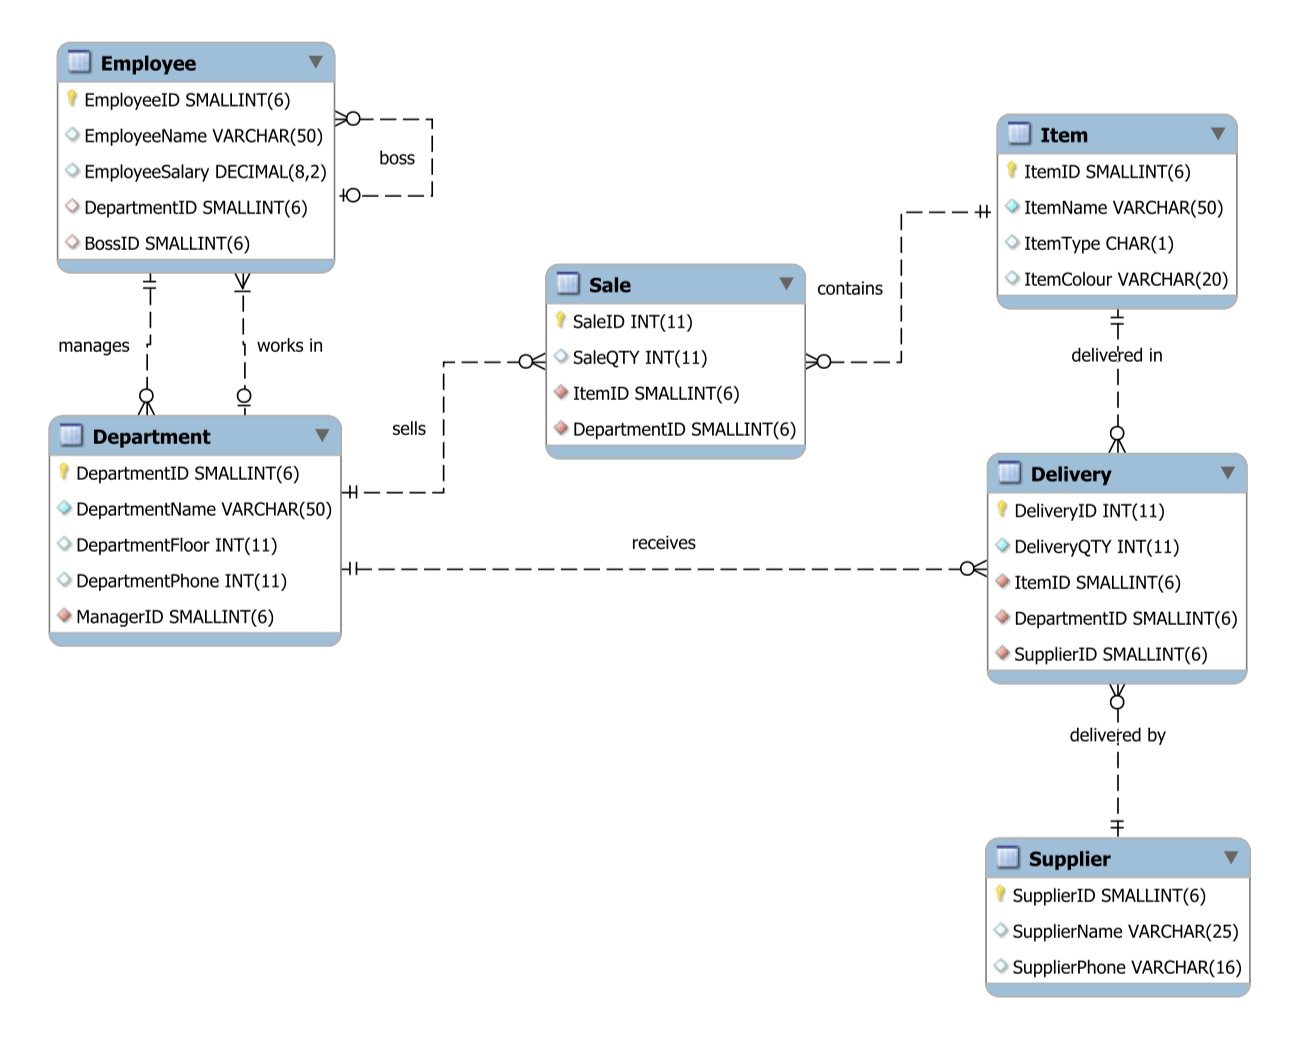

Solve the following problems using relational algebra (RA) and translate to SQL statements:

1. Find the names of all employees.
2. Find the names of all employees in department with id of 1.
3. List the names of green items of type C.
4. Find the items sold by the departments on the second floor (only show ItemID)
5. Find the names of brown items sold by the Recreation department.
6. Find the employees whose salary is less than half that of their managers. (Note: the RA notation for unary joins is not agreed upon, so there are different ways to do this.)

Hint: once you've solved the problem using RA, read $\pi$ as `SELECT` and $\sigma$ as `WHERE`.

1. Find the names of all employees.

    $\pi_{EmployeeName}(Employee)$

```mysql
SELECT EmployeeName
FROM Employee;
```

2. Find the names of all employees in department with id of 1.

    $\pi_{EmployeeName}(\sigma_{DepartmentID = 1}(Employee))$

```mysql
SELECT EmployeeName
FROM Employee
WHERE DepartmentID = 1;
```

3. List the names of green items of type C.

    $\pi_{ItemName}(\sigma_{ItemColour='Green' \wedge ItemType='C'}(Item))$

```mysql
SELECT ItemName
FROM Item
WHERE ItemColour = 'Green'
  AND ItemType = 'C';
```

4. Find the items sold by the departments on the second floor (only show ItemID).

    $\pi_{ItemID}(\sigma_{DepartmentFloor=2}(Sale \bowtie Department))$

```mysql
SELECT DISTINCT ItemID
FROM Sale NATURAL JOIN Department
WHERE DepartmentFloor = 2;
```

5. Find the names of brown items sold by the Recreation department.

    $\pi_{ItemName}(\sigma_{ItemColour='Brown' \wedge DepartmentName='Recreation'}(Item \bowtie Sale \bowtie Department))$

```mysql
SELECT ItemName
FROM Item NATURAL JOIN Sale NATURAL JOIN Department
WHERE ItemColour = 'Brown'
  AND DepartmentName = 'Recreation';
```

6. Find the employees whose salary is less than half that of their managers.





**Option 1a** using the rename $\rho$ operator:

$\rho$(Emp(EmployeeName $\rightarrow$ EmpName, EmployeeSalary $\rightarrow$ EmpSalary, BossID $\rightarrow$ EmpBossID), Employee)
   
$\rho$(Boss(EmployeeID $\rightarrow$ BossEmployeeID, EmployeeSalary $\rightarrow$ BossSalary), Employee)

where Emp and Boss are the result relation names and Employee is the original relation name

$\pi_{EmpName}(\sigma_{EmpSalary \lt (BossSalary/2)}(Emp \bowtie_{EmpBossID=BossEmployeeID}Boss))$

**Option 1b** using the rename $\rho$ operator:

$\rho$(Boss(BossID $\rightarrow$ BossBossID, EmployeeID $\rightarrow$ BossID, EmployeeSalary $\rightarrow$ BossSalary, DepartmentID $\rightarrow$ BossDepID, EmployeeName $\rightarrow$ BossName), Employee)

where Boss is the result relation name and Employee is the original relation name

$\pi_{EmployeeName}(\sigma_{EmployeeSalary \lt (BossSalary/2)}(Employee \bowtie Boss))$

**Option 2** using SQL-like notation:

Emp $\mathrel{\vcenter{:}}=$ Employee

Boss $\mathrel{\vcenter{:}}=$ Employee

$\pi_{Emp.EmployeeName}(\sigma_{Emp.EmployeeSalary \lt (Boss.EmployeeSalary/2)}(Emp \bowtie_{Emp.BossID=Boss.EmployeeID} Boss))$

```mysql
SELECT Emp.EmployeeName
FROM Employee AS Emp
  INNER JOIN Employee AS Boss
  ON Emp.BossID = Boss.EmployeeID
WHERE Emp.EmployeeSalary < (Boss.EmployeeSalary / 2);
```